Name: Joshua Lindsey

Date: 2025/06/01

Project Name: Bitcoin Price Prediction using Machine Learning in Python

Source Code: https://www.geeksforgeeks.org/bitcoin-price-prediction-using-machine-learning-in-python/

In [31]:
# Step 1: imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2: Import data

df = pd.read_csv('bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.shape

(2713, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


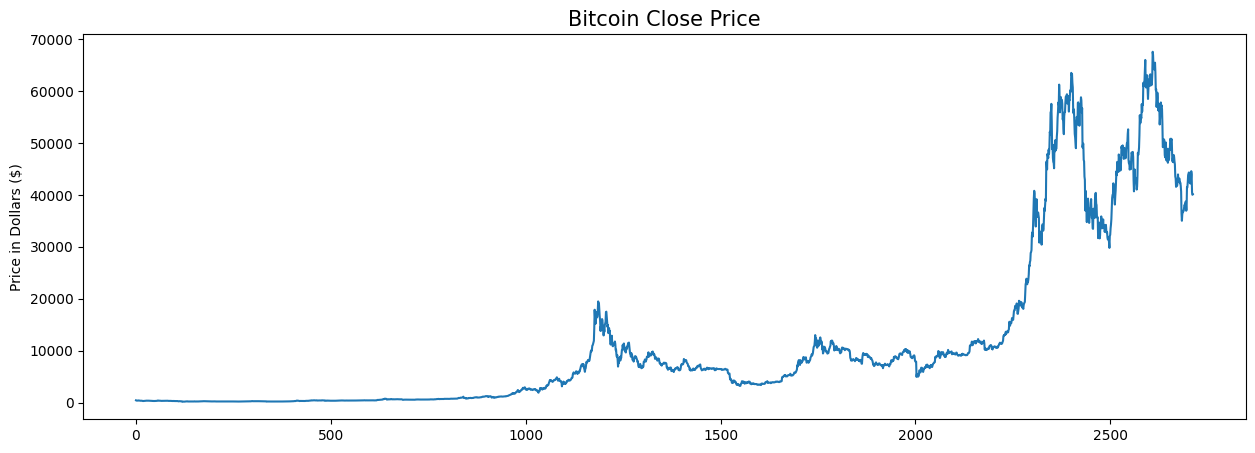

In [6]:
# Step 3: Exploratory Data Analysis

plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title("Bitcoin Close Price", fontsize=15)
plt.ylabel('Price in Dollars ($)')
plt.show()

In [7]:
df[df['Close'] == df['Adj Close']].shape, df.shape

# From here we can conclude that all the rows fo coumns 'Close' and 
# 'Adj Close' have the same data. So, having redundant data in the dataset
# is not going to help so, we'll drop this column before futher analysis

((2713, 7), (2713, 7))

In [8]:
df = df.drop(['Adj Close'], axis=1)

df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

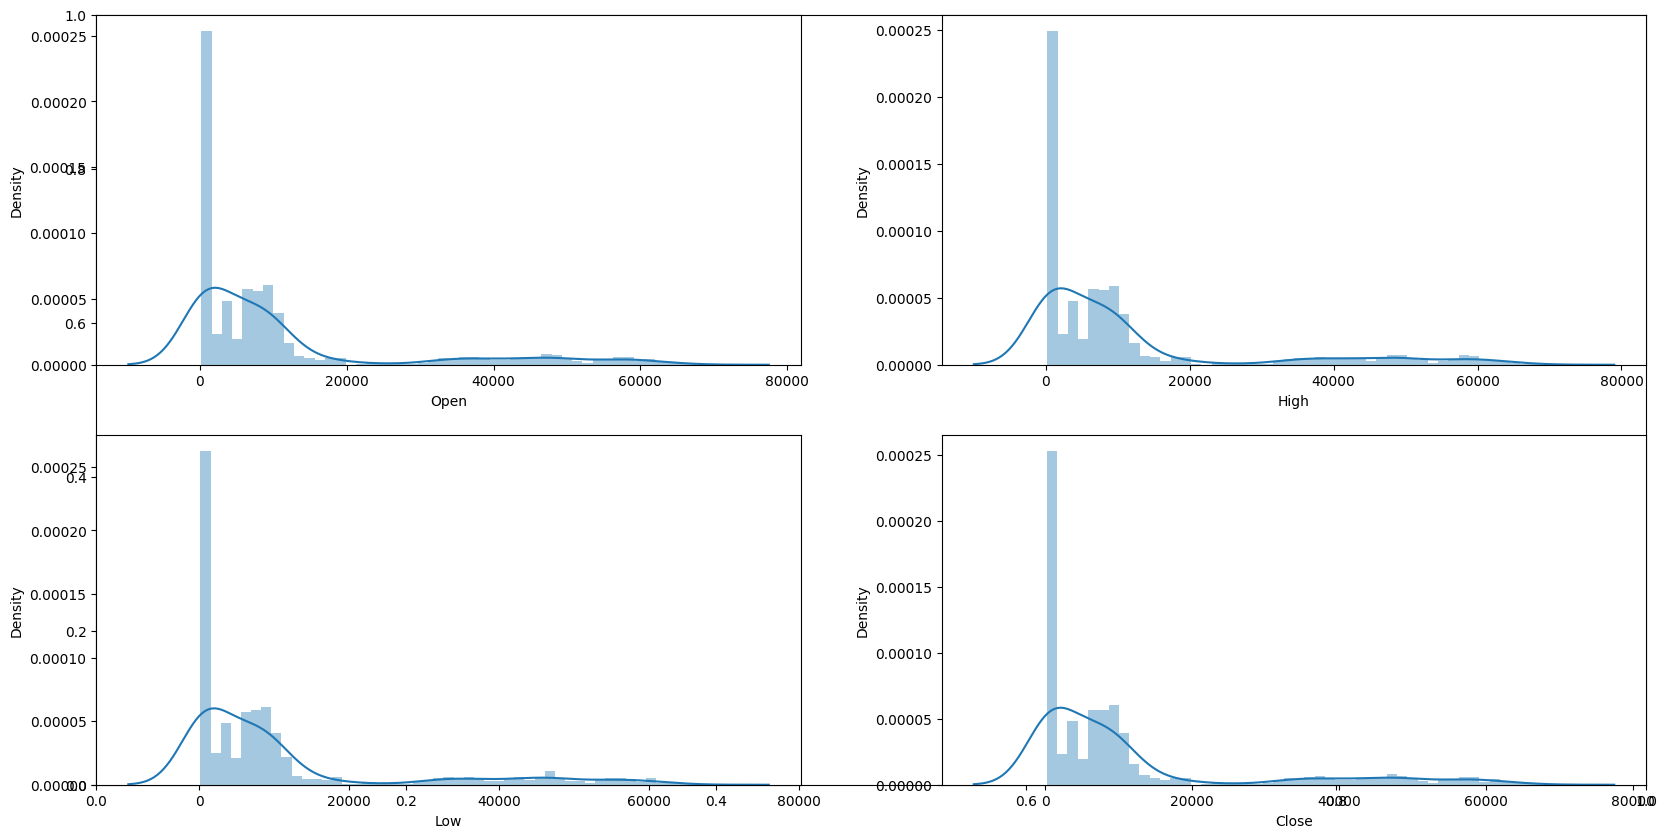

In [9]:
# Zeros implies that there are no null values in the data set provided.

features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.distplot(df[col])
plt.show()


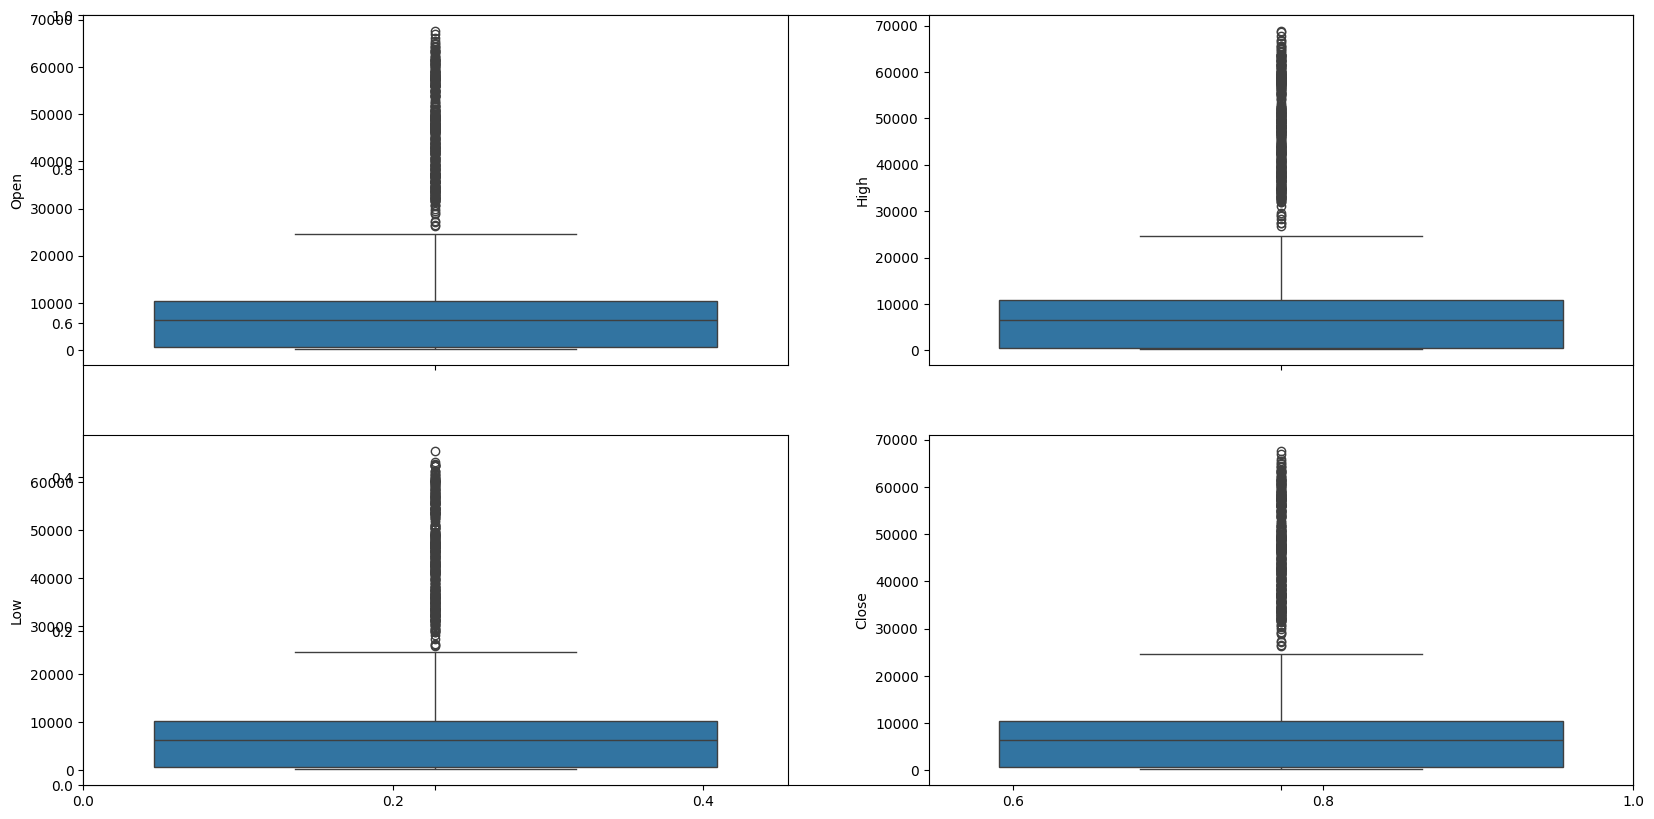

In [10]:
# There are so many outlies in the data which means that the prices of the stock
# have varied hugely in a very short period of time. Let's check this with the
# help of a boxplot.

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col])
plt.show()


In [11]:
# Step 5: Feature Engineering

splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


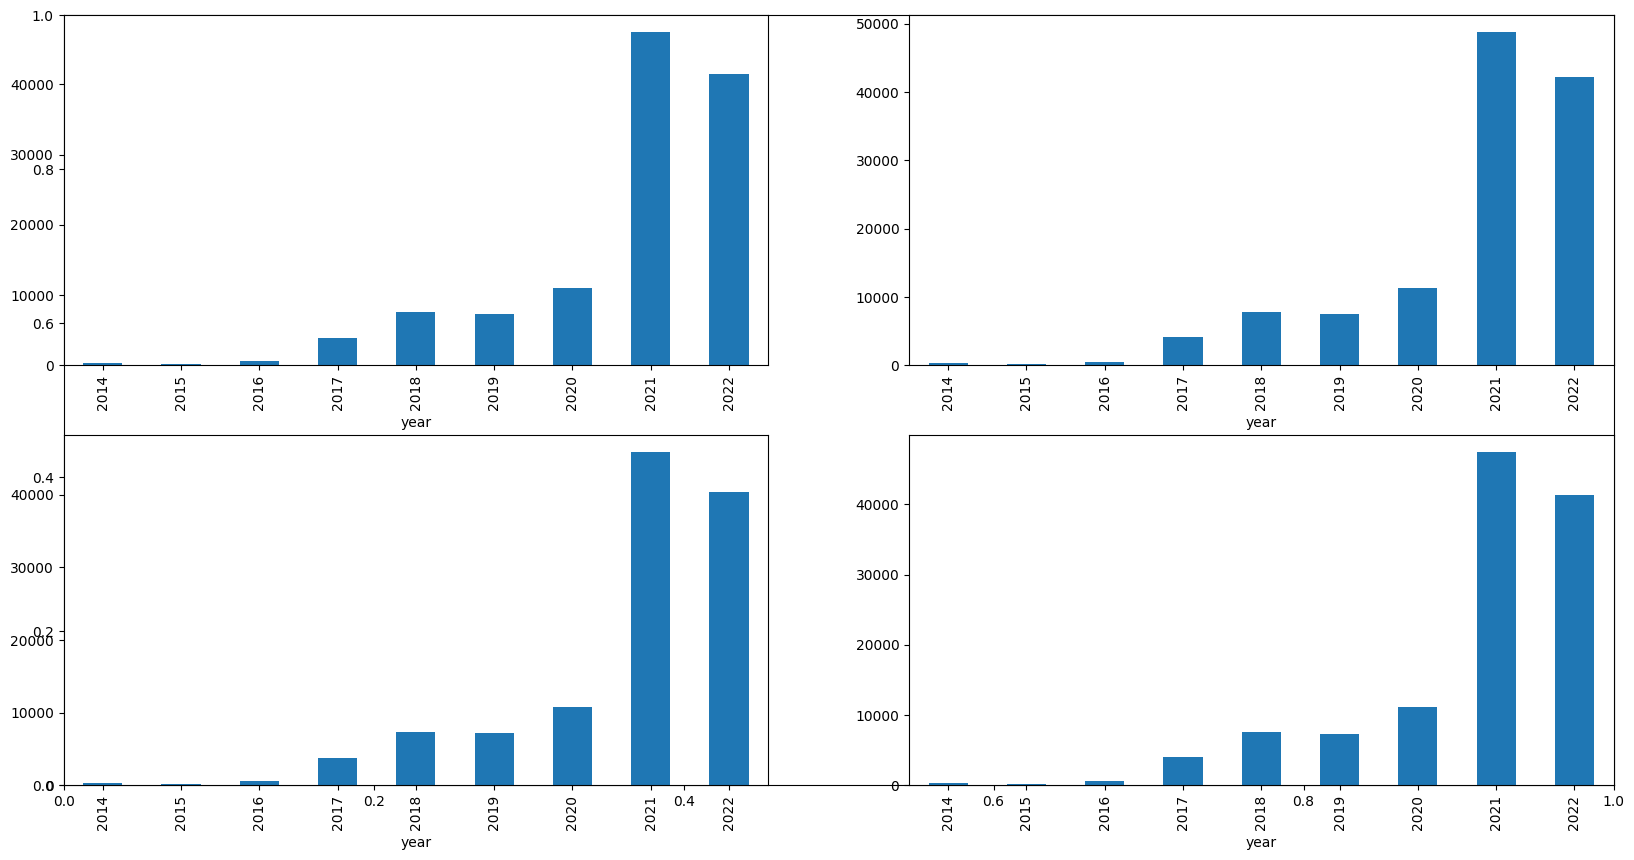

In [12]:
# Now we have three more columns: day, month, year.

data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [19]:
# Outliers due to vast increase in 2021

df['is_quarter_end'] = np.where(df['month'] % 3 == 0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quater_end,open-close,low-high,target,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1,1


In [14]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'],1,0)

In [15]:
# Above we have added some more columsn which will help in the training of our model. We have added the target feature which is a signal whether to buy or not
# we will train our model to predict this only

# Lets also check to see whether the target is balanced or not using a pie chart.

df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quater_end,open-close,low-high,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1


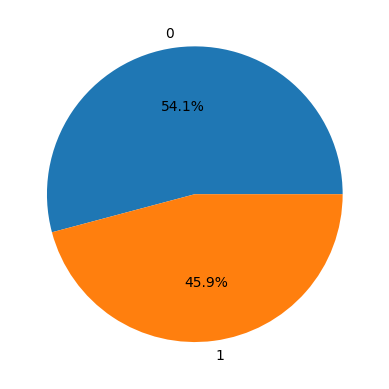

In [16]:
plt.pie(df['target'].value_counts().values, labels=[0,1], autopct = '%1.1F%%')
plt.show()

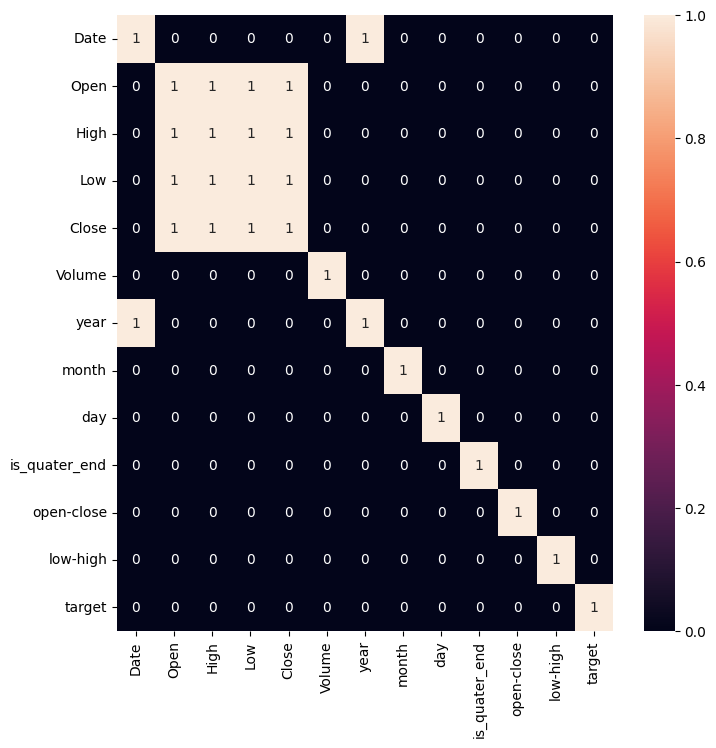

In [17]:
# When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

plt.figure(figsize=(8,8))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=True)
plt.show()

In [29]:
# The added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model

features = df[['open-close', 'low-high','is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

x_train, x_valid, y_train, y_valid = features[:len(features) // 7], features[len(features) // 7:], target[:len(features) // 7], target[len(features) // 7:]

In [30]:
# Step idk: Model Development and Evaluation

# now is the time to train some state of the art machine learning models (Logistic Regression, Support Vector Machine, XGBClassifer), and then based
# on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(x_train, y_train)

    print('{}'.format(models[i]))
    print('Training Accuracy: {}'.format(metrics.roc_auc_score(y_train, models[i].predict_proba(x_train)[:,1])))
    print('Validation Accuracy: {}'.format(metrics.roc_auc_score(y_valid, models[i].predict_proba(x_valid)[:,1])))
    print()

LogisticRegression()
Training Accuracy: 0.5351397573619796
Validation Accuracy: 0.5170956321701721

SVC(kernel='poly', probability=True)
Training Accuracy: 0.4734915290470846
Validation Accuracy: 0.49289032624282975

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
Training Accuracy: 0.9

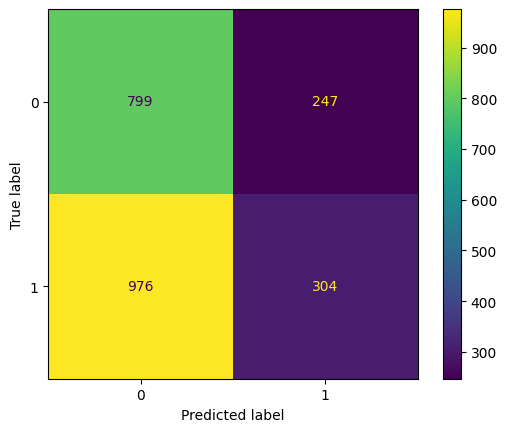

In [32]:
ConfusionMatrixDisplay.from_estimator(models[0], x_valid, y_valid)
plt.show()

In [ ]:
# Basically this mdoel is no better than guessing. Stops here. 